# CNN - Fashion_MNIST

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
np.random.seed(7)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28) y_train shape: (60000,)
X_test shape: (10000, 28, 28) y_test shape: (10000,)


Class :  0


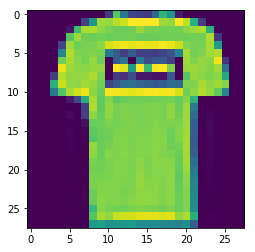

In [4]:
plt.imshow(X_train[1])
print("Class : ",y_train[1])

In [5]:
#Reshape input data 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Normalize inputs from 0-255 to 0-1 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#One hot encoding of outputs
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

num_classes = y_test.shape[1]

In [17]:
#Build CNN model

model = Sequential()

model.add(Conv2D(64, (2,2), input_shape=(28,28,1), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
__________

In [18]:
#Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
#Fit the model
history = model.fit(X_train,y_train, epochs=20,batch_size=128,verbose=1)

Epoch 1/20
60000/60000 [==============================] - 43s 711us/step - loss: 0.6722 - acc: 0.7515
Epoch 2/20
60000/60000 [==============================] - 42s 707us/step - loss: 0.4507 - acc: 0.8354
Epoch 3/20
60000/60000 [==============================] - 43s 715us/step - loss: 0.3941 - acc: 0.8565
Epoch 4/20
60000/60000 [==============================] - 42s 700us/step - loss: 0.3615 - acc: 0.8674
Epoch 5/20
60000/60000 [==============================] - 42s 696us/step - loss: 0.3410 - acc: 0.8739
Epoch 6/20
60000/60000 [==============================] - 42s 700us/step - loss: 0.3273 - acc: 0.8797
Epoch 7/20
60000/60000 [==============================] - 43s 713us/step - loss: 0.3092 - acc: 0.88690s - loss: 0.3093 - acc:
Epoch 8/20
60000/60000 [==============================] - 43s 714us/step - loss: 0.2971 - acc: 0.89071s - loss: 0
Epoch 9/20
60000/60000 [==============================] - 41s 691us/step - loss: 0.2897 - acc: 0.8927
Epoch 10/20
60000/60000 [=====================

10000/10000 [==============================] - 2s 247us/step

acc: 91.37%

loss: 23.40%


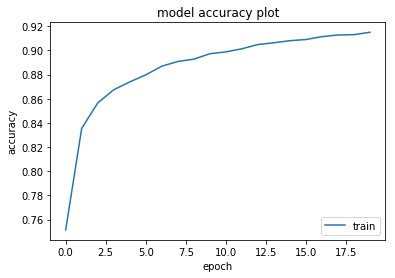

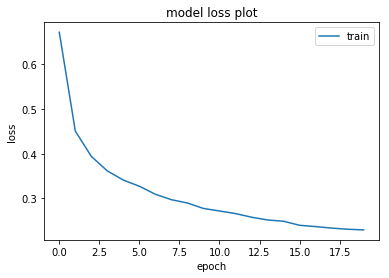

In [20]:
scores = model.evaluate(X_test,y_test)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

# Plot accuracy result
plt.plot(history.history['acc'])
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Plot loss result
plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()